In [69]:
N = (7 + 4 ) % 5 + 1
print("Variant " + str(N))

Variant 2


In [68]:
print('Номер вправ: 3, 4, 5, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 20, 22, 23, 24, 27')

Номер вправ: 3, 4, 5, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 20, 22, 23, 24, 27


In [13]:
import pandas as pd

# Завантаження даних із файлу CSV
file_path = 'NationalNames.csv'
data = pd.read_csv(file_path)

In [10]:
# Завдання 3 : Отримайте імена стовпців набору даних
print("Имена столбцов набора данных:")
print(data.columns)

Имена столбцов набора данных:
Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')


In [71]:
# Завдання 4: Отримайте загальну інформацію про дані у наборі даних.

# Отримати загальну інформацію про дані в наборі
general_info = data.describe()

# Виведення результатів у вигляді таблиці
display(general_info)

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


In [72]:
# Завдання 5: Знайдіть кількість унікальних імен у наборі даних
unique_names_count = data['Name'].nunique()
print("\nКількість унікальних імен у наборі даних:")
print(unique_names_count)


Кількість унікальних імен у наборі даних:
93889


In [73]:
# Завдання 8: Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для якого Count максимальне)
max_count_row = data.loc[data['Count'].idxmax()]
most_popular_name = max_count_row['Name']
year_of_max_count = max_count_row['Year']
print(f"The name is '{most_popular_name}' in {year_of_max_count}")

The name is 'Linda' in 1947


In [74]:
# Завдання 9: Підрахуйте кількість записів, для яких Count - мінімальне у наборі.
min_count = data['Count'].min()
min_count_records = data[data['Count'] == min_count].shape[0]
print(f"Количество записей с минимальным Count: {min_count_records}")

Количество записей с минимальным Count: 254615


In [75]:
# Завдання 11: Знайдіть рік із найбільшою кількістю унікальних імен.
# Знайти рік із найбільшою кількістю унікальних імен
unique_names_by_year = data.groupby('Year')['Name'].nunique()
year_with_most_unique_names = unique_names_by_year.idxmax()
most_unique_names_count = unique_names_by_year.max()

# Створити датафрейм для відображення
result_11 = pd.DataFrame({
    'Year': [year_with_most_unique_names],
    'Name': [most_unique_names_count]
})

# Відобразити результат у вигляді таблиці
display(result_11)

,Year,Name
0,2008,32488


In [76]:
# Завдання 12: Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році)
data_2008 = data[data['Year'] == 2008]
most_popular_in_2008 = data_2008.loc[data_2008['Count'].idxmax()]['Name']
print(f"The most popular name in 2008 is '{most_popular_in_2008}'")


The most popular name in 2008 is 'Jacob'


In [77]:
# Завдання 13: Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих імен
jacob_female = data[(data['Name'] == 'Jacob') & (data['Gender'] == 'F')]
most_popular_jacob_female_year = jacob_female.loc[jacob_female['Count'].idxmax()]

# Вывод результата в виде таблицы
display(most_popular_jacob_female_year.to_frame().T)

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


In [81]:
# Завдання 14: Знайти рік із найбільшою кількістю гендерно нейтральних імен (однакові чоловічі та жіночі імена)
# Знайти гендерно нейтральні імена (однакові для чоловіків і жінок в один рік)
gender_neutral_names = data.groupby(['Year', 'Name']).filter(lambda x: len(x['Gender'].unique()) > 1)

# Підрахувати кількість гендерно нейтральних імен за роками
gender_neutral_counts = gender_neutral_names.groupby('Year')['Name'].nunique()

# Знайти рік із найбільшою кількістю гендерно нейтральних імен
year_with_most_gender_neutral = gender_neutral_counts.idxmax()
gender_neutral_name_count = gender_neutral_counts.max()

# Створити датафрейм для відображення
result_14 = pd.DataFrame({
    'Year': [year_with_most_gender_neutral],
    'Gender_neutral_names': [gender_neutral_name_count]
})

# Відобразити результат у вигляді таблиці
display(result_14)

,Year,Gender_neutral_names
0,2008,2557


In [82]:
# Завдання 16: Знайдіть рік, коли народилося найбільше дітей
most_births_year = data.groupby('Year')['Count'].sum().idxmax()
print(f"Год, когда родилось наибольшее количество детей: {most_births_year}")

Год, когда родилось наибольшее количество детей: 1957


In [83]:
# Завдання 17: Знайдіть кількість дівчаток та хлопчиків, які народились кожного року
births_by_gender_per_year = data.pivot_table(values='Count', index='Year', columns='Gender', aggfunc='sum').head(5)
print("Количество девочек и мальчиков, родившихся каждого года (первые 5 строк):")
display(births_by_gender_per_year)

Количество девочек и мальчиков, родившихся каждого года (первые 5 строк):


Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


In [84]:
# Завдання 18: Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків.
years_more_girls_than_boys = (data.pivot_table(values='Count', index='Year', columns='Gender', aggfunc='sum')['F'] > 
                              data.pivot_table(values='Count', index='Year', columns='Gender', aggfunc='sum')['M']).sum()
print(f"Количество лет, когда девочек рождалось больше, чем мальчиков: {years_more_girls_than_boys}")

Количество лет, когда девочек рождалось больше, чем мальчиков: 54


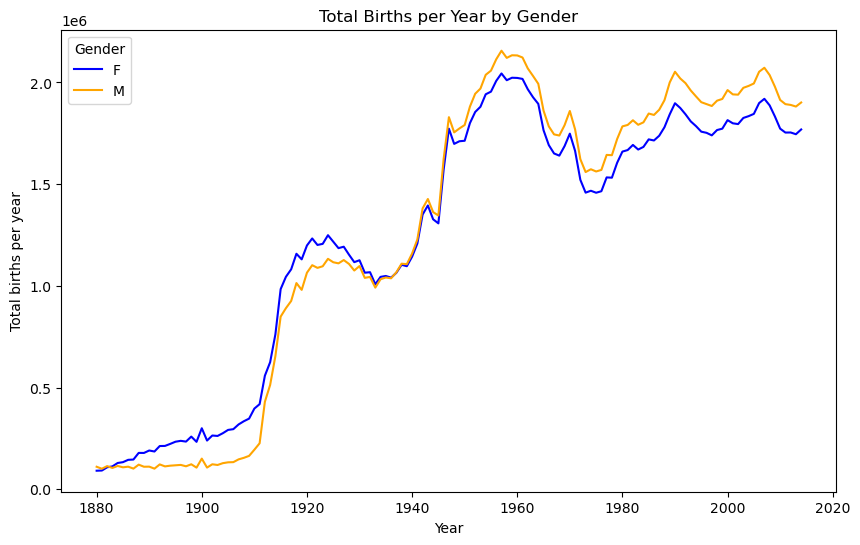

In [85]:
# Завдання 19: Накресліть графік загальної кількості народжень хлопчиків та дівчаток на рік.

import matplotlib.pyplot as plt
# Підготовка даних для графіка
births_by_gender_per_year_full = data.pivot_table(values='Count', index='Year', columns='Gender', aggfunc='sum')

# Побудова графіка
plt.figure(figsize=(10, 6))
plt.plot(births_by_gender_per_year_full.index, births_by_gender_per_year_full['F'], label='F', color='blue')
plt.plot(births_by_gender_per_year_full.index, births_by_gender_per_year_full['M'], label='M', color='orange')

# Налаштування графіка
plt.title('Total Births per Year by Gender')
plt.xlabel('Year')
plt.ylabel('Total births per year')
plt.legend(title='Gender')

# Відображення графіка
plt.show()

In [86]:
# Завдання 20: Підрахуйте кількість гендерно нейтральних імен (однакових для дівчат та хлопців)
gender_neutral_names_count = data.groupby('Name').filter(lambda x: len(x['Gender'].unique()) > 1)['Name'].nunique()
print(gender_neutral_names_count)


10221


In [87]:
# Завдання 22: Підрахуйте скільки років проводилось спостереження
years_of_observation = data['Year'].nunique()
print(f"Спостереження проводилось {years_of_observation} років")

Спостереження проводилось 135 років


In [88]:
# Завдання 23: Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року)

# Знайти найпопулярніші гендерно-нейтральні імена (присутні щороку)
gender_neutral_names = data.groupby(['Year', 'Name']).filter(lambda x: len(x['Gender'].unique()) > 1)
popular_gender_neutral_names = gender_neutral_names.groupby('Name').size().sort_values(ascending=False).head(15)

# Перетворення в DataFrame без відображення кількості
popular_gender_neutral_names_df = pd.DataFrame(popular_gender_neutral_names.index).reset_index(drop=True)

# Відображення результату
display(popular_gender_neutral_names_df)

,Name
0,Lee
1,James
2,Johnnie
3,Jesse
4,Ollie
5,Marion
6,Jessie
7,Robert
8,Tommie
9,Joseph


In [90]:
# Завдання 24: Знайти найпопулярніше серед непопулярних імен (непопулярне ім’я, яким називали дітей найбільшу кількість разів )

# Визначаємо поріг для «непопулярних» імен (наприклад, тих, що трапляються менше 100 разів)
threshold = 100

# Групуємо імена за їхньою загальною кількістю використань і фільтруємо за непопулярними іменами
names_count = data.groupby('Name').sum()['Count']
unpopular_names = names_count[names_count < threshold]

# Знаходимо найпопулярніше ім'я серед непопулярних
most_popular_unpopular_name = unpopular_names.idxmax()
most_popular_unpopular_count = unpopular_names.max()

# Виведення результату
print(f"Найбільш популярне з непопулярних імен - це {most_popular_unpopular_name}. Їм називали {most_popular_unpopular_count} разів.")

Найбільш популярне з непопулярних імен - це Aayana. Їм називали 99 разів.


In [92]:
# Фільтруємо дані за ім'ям «Celester»
celester_data = data[data['Name'] == 'Celester']

# Підсумовуємо кількість використань імені «Celester»
celester_total_count = celester_data['Count'].sum()

# Виведення результату
print(f"Имя 'Celester' использовалось {celester_total_count} раз.")

Имя 'Celester' использовалось 401 раз.


In [91]:
# Задание 27: Знайти найпопулярніші імена в кожному році.

# Знайти найпопулярніші імена в кожному році
popular_names_each_year = data.loc[data.groupby('Year')['Count'].idxmax()][['Year', 'Name', 'Count']]

# Відобразити всі рядки результату
display(popular_names_each_year)

,Year,Name,Count
942,1880,John,9655
2938,1881,John,8769
4963,1882,John,9557
7116,1883,John,8894
9318,1884,John,9388
...,...,...,...
1657592,2010,Isabella,22883
1691633,2011,Sophia,21816
1725502,2012,Sophia,22267
1759186,2013,Sophia,21147
